In [1]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [2]:
root_path = "."

In [3]:
time_re = re.compile("apply - inverse mass -.*\|\s+(\d+)\s+\|\s+(\d+(\.\d+)?)")

In [4]:
iter_re = re.compile("DEAL:.*::iterations:\s*(\d+)")

In [ ]:
batch_iter_re = re.compile("\[(\d+)\|(\d+)\|")

In [5]:
def config_data(filename: str):
    items = filename.replace(".out", "").split("-")
    return dict((key, value) for key, value in [item.split("_", maxsplit=1) for item in items])

In [7]:
data = []
for file in Path(f"{root_path}/data").iterdir():
    with open(file, "r") as input:
        if t_m := time_re.search(input.read()):
            data.append({**config_data(file.name),
                         "time": t_m.group(2), "timesteps": t_m.group(1)})
df = pd.DataFrame(data).astype({"dim": int, "ncells": int, "degree": int, "timesteps": int, "time": float}).drop(columns=["cpu", "dryrun", "fmt", "refinements", "dim", "batchsize", "exec", "gpu"])
df

,ncells,degree,solver,testcase,time,timesteps
0,102400,5,matrix_based,1,4.2440,70
1,100,3,batched_iterative,1,0.5541,2635
2,16,5,batched_iterative,0,0.4549,3395
3,100,3,matrix_based,1,4.3350,2635
4,1048576,3,batched_iterative,0,7.3920,20
...,...,...,...,...,...,...
56,6400,5,matrix_based,1,2.3500,275
57,65536,3,batched_iterative,0,1.9840,75
58,65536,3,matrix_based,0,1.7750,75
59,65536,5,batched_iterative,0,1.9880,75


In [66]:
file = "data/ncells_100-batchsize_full-cpu_False-dim_2-dryrun_False-exec_cuda-fmt_csr-gpu_True-degree_5-refinements_0-solver_batched_iterative-testcase_1.out"
with open(file, "r") as input:
    iters = []
    for l in input:
        if i_m:= batch_iter_re.search(l):
            iters.append(pd.Series(map(int, l[i_m.end():-2].split(","))).describe().T)
    print(pd.DataFrame(iters))

      count  mean       std  min  25%  50%  75%   max
0     100.0  6.33  4.467741  2.0  4.0  4.0  5.0  18.0
1     100.0  7.09  4.512821  4.0  4.0  5.0  5.0  17.0
2     100.0  6.66  3.972685  4.0  4.0  5.0  5.0  17.0
3     100.0  6.71  4.015865  4.0  4.0  5.0  5.0  17.0
4     100.0  6.73  4.057304  4.0  4.0  5.0  5.0  17.0
...     ...   ...       ...  ...  ...  ...  ...   ...
2630  100.0  6.33  4.299530  3.0  4.0  4.0  4.0  17.0
2631  100.0  6.35  4.347006  3.0  4.0  4.0  4.0  17.0
2632  100.0  6.35  4.347006  3.0  4.0  4.0  4.0  17.0
2633  100.0  6.35  4.347006  3.0  4.0  4.0  4.0  17.0
2634  100.0  6.35  4.347006  3.0  4.0  4.0  4.0  17.0

[2635 rows x 8 columns]


In [69]:
t = pd.DataFrame(iters)
t.quantile(0.9)

count    100.000000
mean       6.476000
std        4.403064
min        4.000000
25%        4.000000
50%        4.000000
75%        5.000000
max       17.000000
Name: 0.9, dtype: float64

In [ ]:
df['time_normalized'] = df.time / df.timesteps / df.ncells
df

In [9]:
df0 = df[df.testcase == "0"]
df1 = df[df.testcase == "1"]

In [33]:
t1 = df1.set_index(["ncells", "degree", "solver"]).time_normalized.sort_index()
t0 = df0.set_index(["ncells", "degree", "solver"]).time_normalized.sort_index()

In [26]:
t1.unstack([1, 2])[5]

solver,matrix_based,batched_iterative
ncells,,
100,1.589753e-05,2.089943e-06
400,5.112000e-06,8.458000e-07
1600,2.635965e-06,6.489035e-07
6400,1.335227e-06,5.693182e-07
25600,7.784598e-07,5.443638e-07
102400,5.920759e-07,5.417132e-07
409600,5.323661e-07,4.449637e-07
1638400,NaN,NaN


Text(0.5, 1.0, 'P5')

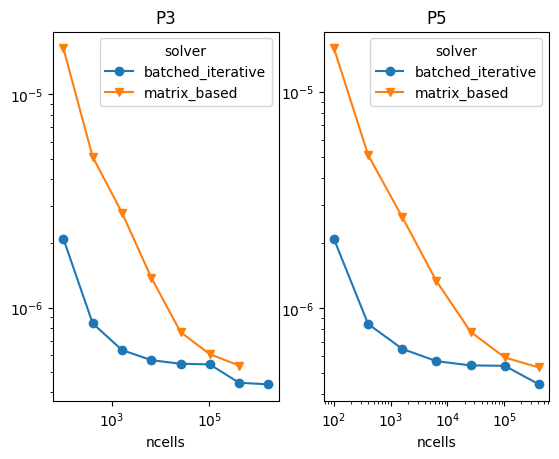

In [36]:
fig, axes = plt.subplots(1, 2)
data = t1.unstack([1, 2])
data[3].plot(ax=axes[0], logx=True, logy=True)
axes[0].set_title("P3")
data[5].plot(ax=axes[1], logx=True, logy=True)
axes[1].set_title("P5")

Text(0.5, 1.0, 'P5')

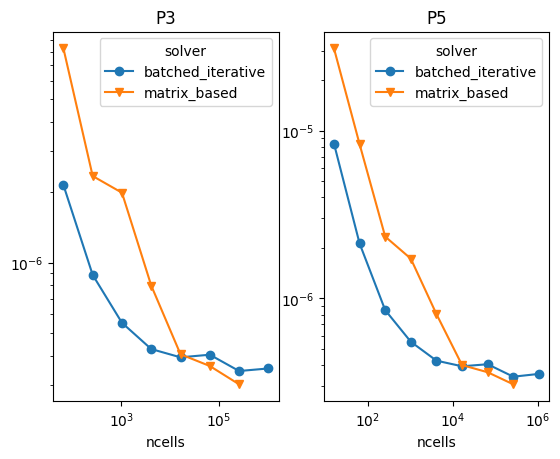

In [37]:
fig, axes = plt.subplots(1, 2)
data = t0.unstack([1, 2])
data[3].plot(ax=axes[0], logx=True, logy=True)
axes[0].set_title("P3")
data[5].plot(ax=axes[1], logx=True, logy=True)
axes[1].set_title("P5")

In [42]:
a = pd.Series([1,2,3])
b = pd.Series([4,5,6, 7])
p = pd.DataFrame({"a": a, "b": b})
p

,a,b
0,1.0,4
1,2.0,5
2,3.0,6
3,NaN,7


In [44]:
p.columns

Index(['a', 'b'], dtype='object')